# Metropolis-Hastings Algorithm

We first define the likelihood and priors as stated in the problem statement. 
Then we pick some initial random values for $\alpha$, $\lambda_1$ and $\lambda_2$. Then we perform a loop in which we sample $\alpha$, $\lambda_1$ and $\lambda_2$ from a normal distribution which is centered on the previous values of these parameters and accept them with a specific probability. The acceptance probability is the ratio of the proposed posterior probability to the current posterior probability. This ratio determines how likely it is to accept the proposed parameters over the current ones. If this ratio is greater than 1, it means the proposed parameters have a higher posterior probability than the current ones, suggesting a beneficial move. If our current parameters are $\alpha$, $\lambda_1$ and $\lambda_2$ and the proposed parameters are $\alpha'$, $\lambda_1'$ and $\lambda_2'$, the ratio will be calculated as $\frac{p(data| \alpha', \lambda_1', \lambda_2')p(\alpha')p(\lambda_1')p(\lambda_2')}{p(data| \alpha, \lambda_1, \lambda_2)p(\alpha)p(\lambda_1)p(\lambda_2)}$. If the acceptance ratio is greater than or equal to 1, the proposed parameters are more probable than the current ones, so we always accept the move from current to proposed parameters. Otherwise, the proposed parameters are less probable, but there's still a chance to accept them. We generate a random number u from a uniform distribution over [0, 1] and accept the move if $u < acceptance\_ratio$. This allows the algorithm to explore the parameter space and avoid getting trapped in local optima. I tried to adjust the variance of the normal distribution to get an acceptance rate around 22.4


In [1]:
import numpy as np
import scipy.stats as stats

# Data representation
deaths = np.arange(10)  # 0 to 9 deaths
frequencies = np.array([162, 267, 271, 185, 111, 61, 27, 8, 3, 1])

# Prior distributions
alpha_prior = lambda alpha: stats.uniform.pdf(alpha, 0, 1)
lambda_prior = lambda l: stats.gamma.pdf(l, 0.1, scale=10)  # scale = 1/rate

# Likelihood function
def likelihood(y, alpha, lambda1, lambda2):
    likelihood = 0
    for i, y_i in enumerate(y):
        poisson_mix = alpha * stats.poisson.pmf(i, lambda1) + (1 - alpha) * stats.poisson.pmf(i, lambda2)
        likelihood += y_i * np.log(poisson_mix)
    return np.exp(likelihood)

# Metropolis-Hastings sampling
def metropolis_hastings(N_iter=8000):
    # Initial parameter values
    alpha, lambda1, lambda2 = 0.67, 2, 1
    samples = []
    accept_count = 0 
    
    for _ in range(N_iter):
        # Proposal
        alpha_prime, lambda1_prime, lambda2_prime = np.random.normal([alpha, lambda1, lambda2], 0.182)
        alpha_prime = np.clip(alpha_prime, 0, 1)  # Ensuring alpha stays within bounds

        # Acceptance
        current_posterior = likelihood(deaths, alpha, lambda1, lambda2) * alpha_prior(alpha) * lambda_prior(lambda1) * lambda_prior(lambda2)
        prime_posterior = likelihood(deaths, alpha_prime, lambda1_prime, lambda2_prime) * alpha_prior(alpha_prime) * lambda_prior(lambda1_prime) * lambda_prior(lambda2_prime)
        acceptance_ratio = prime_posterior / current_posterior

        if (np.random.rand() < acceptance_ratio) :
            alpha, lambda1, lambda2 = alpha_prime, lambda1_prime, lambda2_prime
            accept_count += 1 

        samples.append((alpha, lambda1, lambda2))

    acceptance_rate = accept_count / N_iter  # Calculate acceptance rate
    return np.array(samples), acceptance_rate
    

samples,acceptance_rate  = metropolis_hastings()
print("acceptance_rate: ", acceptance_rate)

acceptance_rate:  0.246


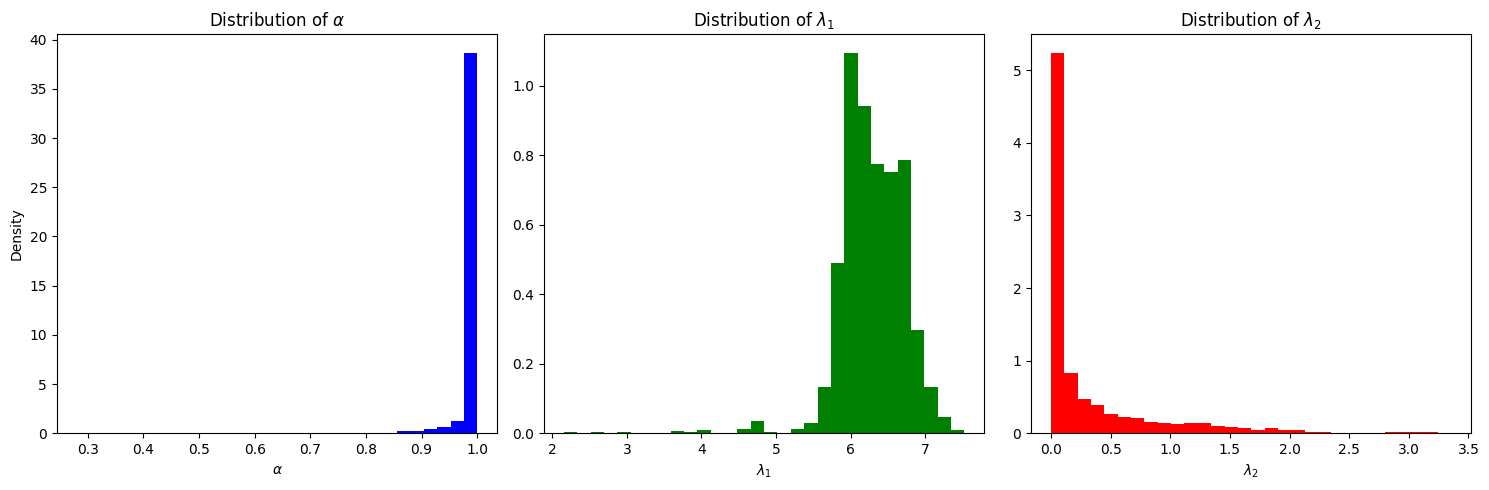

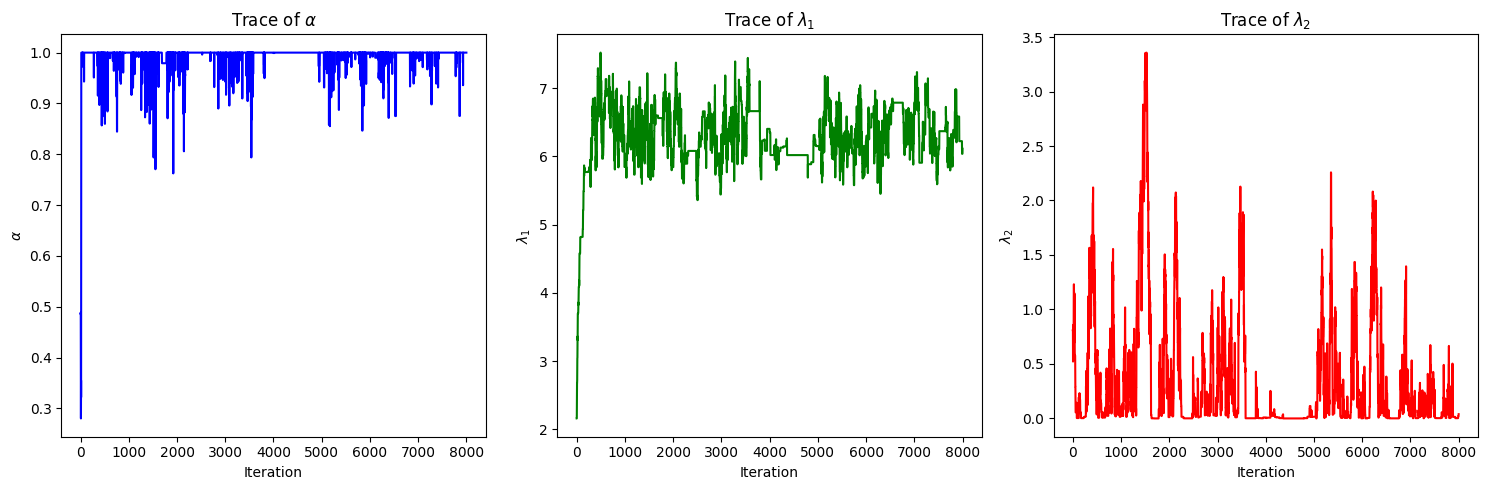

In [2]:
import matplotlib.pyplot as plt

# Assuming 'samples' is the array returned by the metropolis_hastings function
# and it has the shape (N_samples, 3), where N_samples is the number of samples
# and 3 corresponds to alpha, lambda1, and lambda2

# Extract individual parameter samples
alpha_samples = samples[:, 0]
lambda1_samples = samples[:, 1]
lambda2_samples = samples[:, 2]

# Histograms for parameter distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(alpha_samples, bins=30, density=True, color='blue')
plt.title(r'Distribution of $\alpha$')
plt.xlabel(r'$\alpha$')
plt.ylabel('Density')

plt.subplot(1, 3, 2)
plt.hist(lambda1_samples, bins=30, density=True, color='green')
plt.title(r'Distribution of $\lambda_1$')
plt.xlabel(r'$\lambda_1$')

plt.subplot(1, 3, 3)
plt.hist(lambda2_samples, bins=30, density=True, color='red')
plt.title(r'Distribution of $\lambda_2$')
plt.xlabel(r'$\lambda_2$')

plt.tight_layout()
plt.show()

# Trace plots for parameter samples
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(alpha_samples, color='blue')
plt.title(r'Trace of $\alpha$')
plt.xlabel('Iteration')
plt.ylabel(r'$\alpha$')

plt.subplot(1, 3, 2)
plt.plot(lambda1_samples, color='green')
plt.title(r'Trace of $\lambda_1$')
plt.xlabel('Iteration')
plt.ylabel(r'$\lambda_1$')

plt.subplot(1, 3, 3)
plt.plot(lambda2_samples, color='red')
plt.title(r'Trace of $\lambda_2$')
plt.xlabel('Iteration')
plt.ylabel(r'$\lambda_2$')

plt.tight_layout()
plt.show()


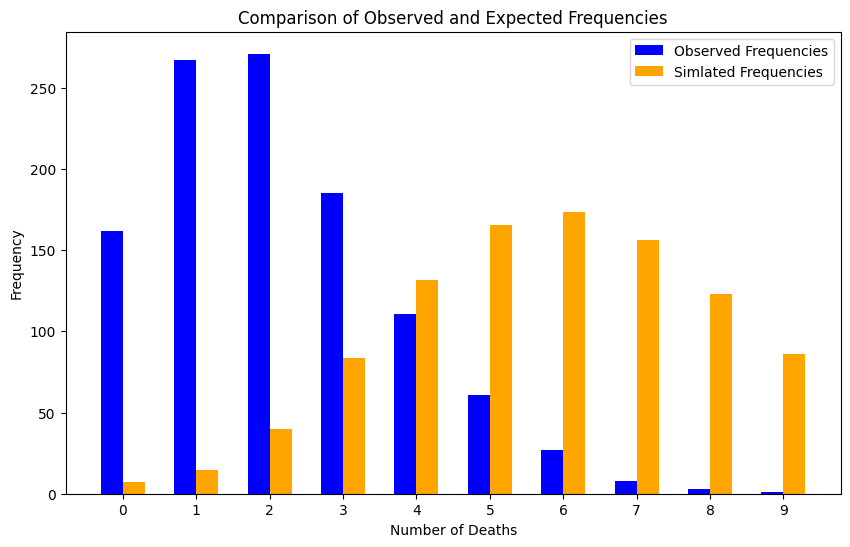

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# the mean of the sampled parameters
alpha_mean = np.mean(samples[:, 0])
lambda1_mean = np.mean(samples[:, 1])
lambda2_mean = np.mean(samples[:, 2])

# Observed data
deaths = np.arange(10)  # 0 to 9 deaths
observed_frequencies = np.array([162, 267, 271, 185, 111, 61, 27, 8, 3, 1])  # From the given data

# Calculate expected frequencies using the Poisson mixture model
Simlated_frequencies = np.array([alpha_mean * stats.poisson.pmf(death, lambda1_mean) +
                                 (1 - alpha_mean) * stats.poisson.pmf(death, lambda2_mean)
                                 for death in deaths])

# Normalize to match the total number of observations
total_days = np.sum(observed_frequencies)
Simlated_frequencies *= total_days

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.bar(deaths - 0.15, observed_frequencies, width=0.3, label='Observed Frequencies', color='blue')
plt.bar(deaths + 0.15, Simlated_frequencies, width=0.3, label='Simlated Frequencies', color='orange')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.title('Comparison of Observed and Expected Frequencies')
plt.xticks(deaths)
plt.legend()
plt.show()


In [4]:
lambda1_median_mh = np.median(samples[:, 1])
lambda2_median_mh = np.median(samples[:, 2])

# Print the point estimates
print(f"Lambda1 Mean: {lambda1_mean:.4f}, Lambda1 Median: {lambda1_median_mh:.4f}")
print(f"Lambda2 Mean: {lambda2_mean:.4f}, Lambda2 Median: {lambda2_median_mh:.4f}")

Lambda1 Mean: 6.2918, Lambda1 Median: 6.2716
Lambda2 Mean: 0.3190, Lambda2 Median: 0.0559


# Gibbs Sampler


### Step 1: Specify the Model

Given data $(y = \{y_1, \ldots, y_N\}$ where $y_i $ represents the number of deaths on day $ i$, and assuming $y_i $ arises from a mixture of two Poisson distributions, the likelihood of observing $y_i$ is:

$ p(y_i | \alpha, \lambda_1, \lambda_2) = \alpha \frac{e^{-\lambda_1} \lambda_1^{y_i}}{y_i!} + (1 - \alpha) \frac{e^{-\lambda_2} \lambda_2^{y_i}}{y_i!} $

### Step 2: Introducing Latent Variables

We introduce a latent variable $z_i$ for each observation $ y_i$, where $z_i = 1$ if $y_i$ comes from the first Poisson distribution and $z_i = 2$ if it comes from the second. This step simplifies the model by allowing us to work with conditional distributions of simpler forms.

### Step 3: Specify the Priors

As given, the prior for $\alpha$ is uniform on [0, 1] ($\alpha \sim U[0, 1]$) and the priors for $\lambda_1$ and $\lambda_2$ are Gamma distributed with shape and rate parameters both equal to 0.1 ($\lambda_i \sim G(0.1, 0.1)$ for $i=1,2$.

### Step 4: Gibbs Sampler Algorithm

The Gibbs sampler iterates through the following steps:

1. **Sample $z_i$ given $\alpha, \lambda_1, \lambda_2, y_i$:** For each observation $y_i$, calculate the conditional probability of $z_i$ being 1 or 2 based on the current values of $\alpha, \lambda_1, \lambda_2$ and update $z_i$ accordingly.

2. **Sample $\alpha$ given $\{z_i\}$:** With $z_i$ known, update $\alpha$ from its conditional distribution, which is a Beta distribution due to the conjugacy of the Beta and Bernoulli in the context of mixture models.

3. **Sample $\lambda_1$ and $\lambda_2$ given $\{y_i\}, \{z_i\}$:** For each $\lambda$, use only the $y_i$s corresponding to their respective distribution as indicated by $z_i$. Update $\lambda_1$ and $\lambda_2$ from their conditional Gamma distributions, which are derived from the conjugacy between the Gamma and Poisson distributions.

### Step 5: Iterate and Collect Samples

We repeat steps 1 to 3 for some iterations to obtain a sequence of samples from the joint posterior distribution of $\alpha, \lambda_1, \lambda_2$. We discard the first few iterations and use the remaining samples to estimate the posterior distributions and perform inference.




In [6]:
import numpy as np
import scipy.stats as stats

# Observed frequencies
y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
frequencies = np.array([162, 267, 271, 185, 111, 61, 27, 8, 3, 1])
N = np.sum(frequencies)  # Total number of observations

# Initial parameter guesses
alpha = 0.5
lambda1 = 1.0
lambda2 = 2.0

# Initial latent variable guesses (randomly assign to start)
Z = np.random.choice([1, 2], size=N)

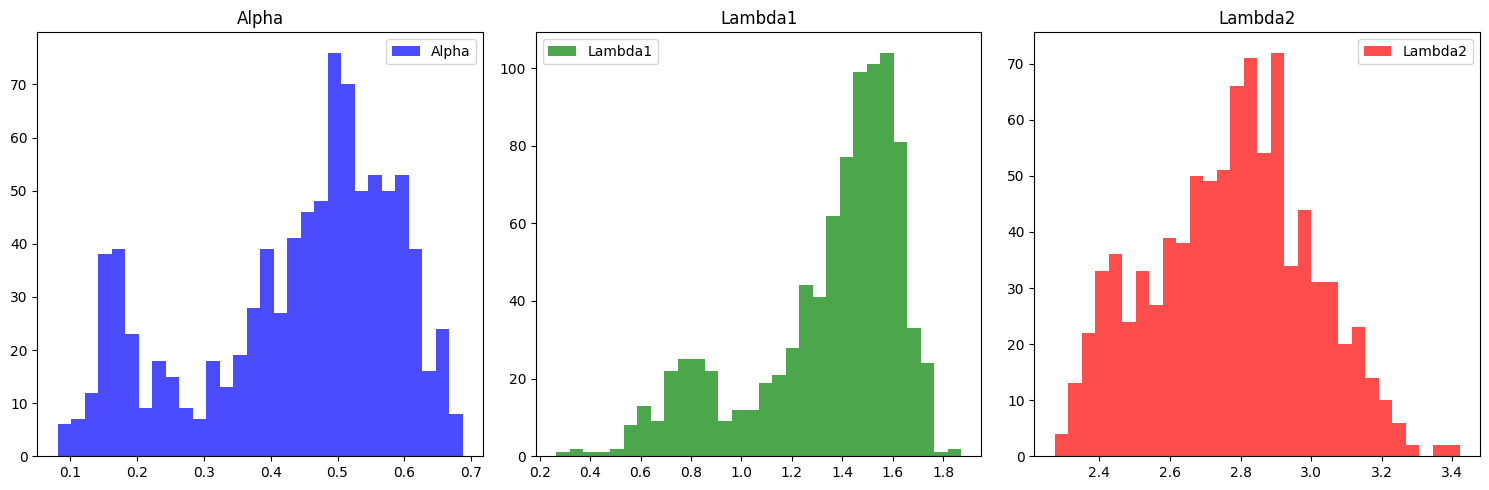

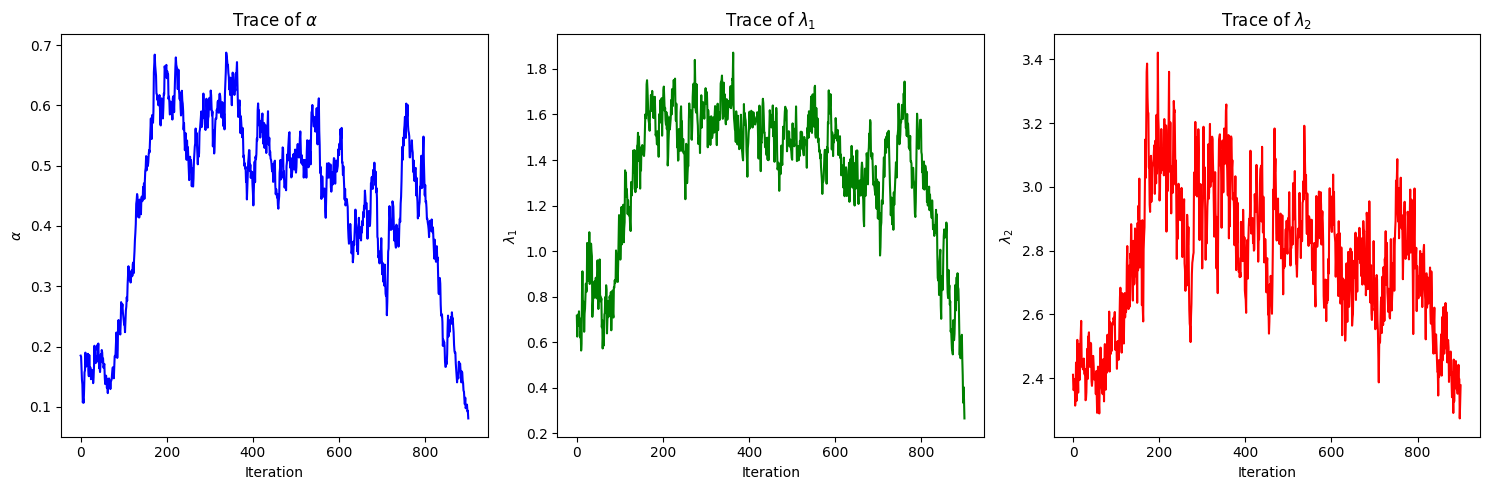

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulated data based on observed frequencies
data = np.repeat(y, frequencies)

# Function to sample Z
def sample_z(alpha, lambda1, lambda2, data):
    prob_1 = alpha * stats.poisson.pmf(data, lambda1)
    prob_2 = (1 - alpha) * stats.poisson.pmf(data, lambda2)
    return np.array([1 if np.random.rand() < p1 / (p1 + p2) else 2 for p1, p2 in zip(prob_1, prob_2)])

# Function to sample alpha
def sample_alpha(Z):
    return np.random.beta(1 + np.sum(Z == 1), 1 + np.sum(Z == 2))

# Function to sample lambda
def sample_lambda(data, Z, which_lambda):
    data_filtered = data[Z == which_lambda]
    return np.random.gamma(0.1 + np.sum(data_filtered), 1 / (0.1 + len(data_filtered)))

# Initialize parameters
alpha_samples = [0.5]
lambda1_samples = [1.0]
lambda2_samples = [2.0]

# Gibbs sampling iterations
n_iterations = 1000
for _ in range(n_iterations):
    Z = sample_z(alpha_samples[-1], lambda1_samples[-1], lambda2_samples[-1], data)
    alpha_samples.append(sample_alpha(Z))
    lambda1_samples.append(sample_lambda(data, Z, 1))
    lambda2_samples.append(sample_lambda(data, Z, 2))

# Discard burn-in
burn_in = int(n_iterations * 0.1)
alpha_samples, lambda1_samples, lambda2_samples = alpha_samples[burn_in:], lambda1_samples[burn_in:], lambda2_samples[burn_in:]

# Visualization

# Histograms for parameter distributions
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(alpha_samples, bins=30, alpha=0.7, color='blue', label='Alpha')
axs[0].set_title('Alpha')
axs[1].hist(lambda1_samples, bins=30, alpha=0.7, color='green', label='Lambda1')
axs[1].set_title('Lambda1')
axs[2].hist(lambda2_samples, bins=30, alpha=0.7, color='red', label='Lambda2')
axs[2].set_title('Lambda2')

for ax in axs:
    ax.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(alpha_samples, color='blue')
plt.title(r'Trace of $\alpha$')
plt.xlabel('Iteration')
plt.ylabel(r'$\alpha$')

plt.subplot(1, 3, 2)
plt.plot(lambda1_samples, color='green')
plt.title(r'Trace of $\lambda_1$')
plt.xlabel('Iteration')
plt.ylabel(r'$\lambda_1$')

plt.subplot(1, 3, 3)
plt.plot(lambda2_samples, color='red')
plt.title(r'Trace of $\lambda_2$')
plt.xlabel('Iteration')
plt.ylabel(r'$\lambda_2$')

plt.tight_layout()
plt.show()




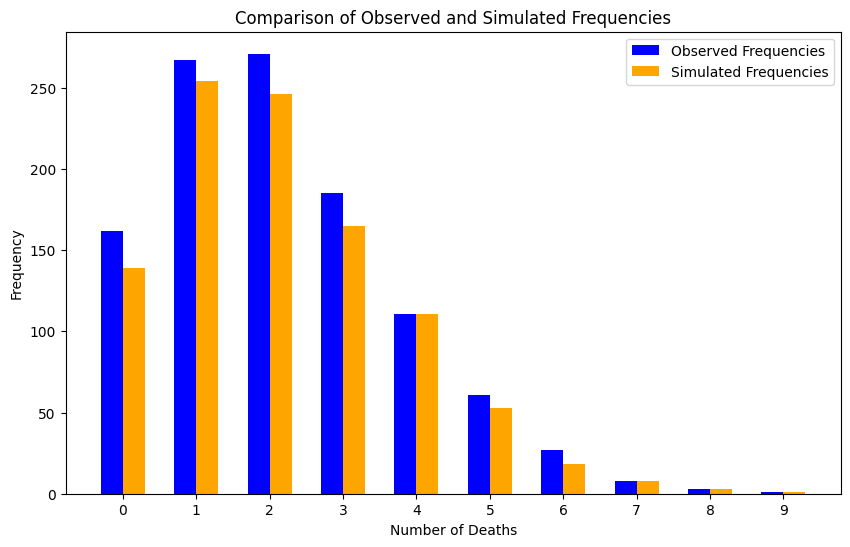

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean of the sampled parameters
alpha_mean = np.mean(alpha_samples)
lambda1_mean = np.mean(lambda1_samples)
lambda2_mean = np.mean(lambda2_samples)

# Simulating observations from the mixture model
def simulate_mixture(alpha, lambda1, lambda2, size=1000):
    # Decide which distribution each simulation comes from
    dist_choice = np.random.choice([1, 2], p=[alpha, 1-alpha], size=size)
    # Generate data from the chosen distribution
    simulated_data = np.where(dist_choice == 1, np.random.poisson(lambda1, size=size), np.random.poisson(lambda2, size=size))
    return simulated_data

simulated_data = simulate_mixture(alpha_mean, lambda1_mean, lambda2_mean)

# Calculate frequencies for each death count in simulated data
simulated_frequencies = [np.sum(simulated_data == i) for i in range(10)]

# Observed frequencies from the problem statement
observed_frequencies = np.array([162, 267, 271, 185, 111, 61, 27, 8, 3, 1])

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.bar(np.arange(10) - 0.15, observed_frequencies, width=0.3, label='Observed Frequencies', color='blue')
plt.bar(np.arange(10) + 0.15, simulated_frequencies, width=0.3, label='Simulated Frequencies', color='orange')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.title('Comparison of Observed and Simulated Frequencies')
plt.xticks(np.arange(10))
plt.legend()
plt.show()


# Meaningful point estimates for $\lambda_1$ and $\lambda_2$

 We can get these estimates from the Gibbs sampling output using the mean or median. These point estimates represent the expected values of the parameters given the observed data and the prior information.

In [9]:

lambda1_median = np.median(lambda1_samples)
lambda2_median = np.median(lambda2_samples)

# Print the point estimates
print(f"Lambda1 Mean: {lambda1_mean:.4f}, Lambda1 Median: {lambda1_median:.4f}")
print(f"Lambda2 Mean: {lambda2_mean:.4f}, Lambda2 Median: {lambda2_median:.4f}")


Lambda1 Mean: 1.3408, Lambda1 Median: 1.4406
Lambda2 Mean: 2.7726, Lambda2 Median: 2.7889


The mean and median values are close and both provide good estimates.